In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
# Cell 2: Load the Dataset
city_name=input("Enter any city from (Warangal, Palwancha, Rajendranagar)")
data = pd.read_csv(city_name+'.csv')
data.head()

Enter any city from (Warangal, Palwancha, Rajendranagar)Palwancha


,Date,City,PM2.5,PM10,NO2,SO2,CO,O3,AQI,AQI_Category,Unhealthy
0,2015-01-01,Palwancha,114.564622,365.136230,96.110332,52.097697,4.104570,66.772582,172.801931,Unhealthy for Sensitive Groups,1
1,2015-01-02,Palwancha,109.641408,270.488800,103.072355,63.364395,0.101190,166.013960,152.940333,Unhealthy for Sensitive Groups,1
2,2015-01-03,Palwancha,138.170451,67.315457,10.648888,7.777843,0.608813,174.872004,83.834243,Moderate,0
3,2015-01-04,Palwancha,170.734645,129.814403,61.461518,22.475671,1.587200,83.729361,119.490503,Moderate,0
4,2015-01-05,Palwancha,37.931596,16.609589,91.328124,25.615873,1.262546,196.588478,61.089487,Moderate,0


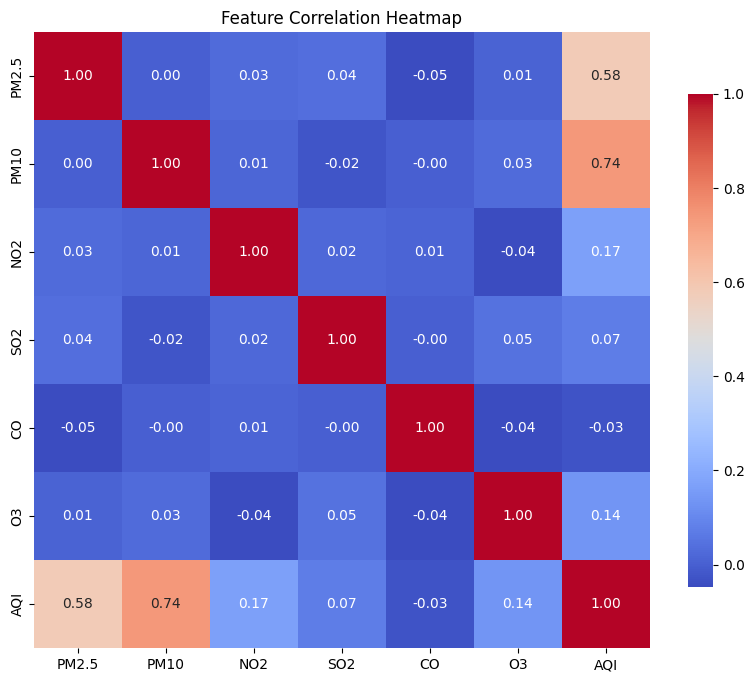

In [ ]:
# Cell 3: Heatmap for Feature Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Cell 4: Preprocess the Data
features = data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
target = data['AQI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_si ze=0.2, random_state=42)

In [ ]:
# Cell 5: Train and Evaluate Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions_rf)
rf_mae = mean_absolute_error(y_test, rf_predictions_rf)
rf_r2 = r2_score(y_test, rf_predictions_rf)

y_test_binary = (y_test > 100).astype(int)
y_pred_binary_rf = (rf_predictions_rf > 100).astype(int)

rf_accuracy = accuracy_score(y_test_binary, y_pred_binary_rf)
rf_precision = precision_score(y_test_binary, y_pred_binary_rf)
rf_recall = recall_score(y_test_binary, y_pred_binary_rf)
rf_f1 = f1_score(y_test_binary, y_pred_binary_rf)


In [ ]:
# Cell 6: Train and Evaluate XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_predictions_xgb = xgb_model.predict(X_test)

# Calculate metrics for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions_xgb)
xgb_mae = mean_absolute_error(y_test, xgb_predictions_xgb)
xgb_r2 = r2_score(y_test, xgb_predictions_xgb)

y_pred_binary_xgb = (xgb_predictions_xgb > 100).astype(int)

xgb_accuracy = accuracy_score(y_test_binary, y_pred_binary_xgb)
xgb_precision = precision_score(y_test_binary, y_pred_binary_xgb)
xgb_recall = recall_score(y_test_binary, y_pred_binary_xgb)
xgb_f1 = f1_score(y_test_binary, y_pred_binary_xgb)

In [ ]:
# Cell 7: Train and Evaluate Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions_gb = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_predictions_gb)
gb_mae = mean_absolute_error(y_test, gb_predictions_gb)
gb_r2 = r2_score(y_test, gb_predictions_gb)

y_pred_binary_gb = (gb_predictions_gb > 100).astype(int)

gb_accuracy = accuracy_score(y_test_binary, y_pred_binary_gb)
gb_precision = precision_score(y_test_binary, y_pred_binary_gb)
gb_recall = recall_score(y_test_binary, y_pred_binary_gb)
gb_f1 = f1_score(y_test_binary, y_pred_binary_gb)


In [ ]:
# Cell 8: Train and Evaluate SVM Model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions_svm = svm_model.predict(X_test)

# Calculate metrics for SVM
svm_mse = mean_squared_error(y_test, svm_predictions_svm)
svm_mae = mean_absolute_error(y_test, svm_predictions_svm)
svm_r2 = r2_score(y_test, svm_predictions_svm)

y_pred_binary_svm = (svm_predictions_svm > 100).astype(int)

svm_accuracy = accuracy_score(y_test_binary, y_pred_binary_svm)
svm_precision = precision_score(y_test_binary, y_pred_binary_svm)
svm_recall = recall_score(y_test_binary, y_pred_binary_svm)
svm_f1 = f1_score(y_test_binary, y_pred_binary_svm)

In [ ]:
# Cell 8_ Part-2: Train and Evaluate Models (Add this code at the end of each model evaluation)

# After evaluating each model, store predictions in a list
predictions = {
    "Random Forest": rf_predictions_rf,
    "XGBoost": xgb_predictions_xgb,
    "Gradient Boosting": gb_predictions_gb,
    "SVM": svm_predictions_svm
}

# Cell 9: Predict Health Problems Based on AQI Predictions

def predict_health_problems(aqi_predictions):
    health_problems = {
        "Respiratory Issues": 0,
        "Cardiovascular Diseases": 0,
        "Neurological Effects": 0,
        "Headaches and Migraines": 0,
        "Allergic Reactions": 0,
        "Fatigue": 0,
        "Increased Hospital Admissions": 0,
        "Impaired Development in Children": 0,
        "Worsening of Pre-existing Conditions": 0,
        "Public Health Concerns": 0
    }

    # Assign percentages based on AQI ranges
    for aqi in aqi_predictions:
        if aqi <= 50:
            health_problems["Respiratory Issues"] += 5
            health_problems["Cardiovascular Diseases"] += 5
        elif aqi <= 100:
            health_problems["Respiratory Issues"] += 10
            health_problems["Cardiovascular Diseases"] += 10
            health_problems["Headaches and Migraines"] += 5
        elif aqi <= 150:
            health_problems["Respiratory Issues"] += 20
            health_problems["Cardiovascular Diseases"] += 15
            health_problems["Neurological Effects"] += 10
            health_problems["Headaches and Migraines"] += 15
        elif aqi <= 200:
            health_problems["Respiratory Issues"] += 30
            health_problems["Cardiovascular Diseases"] += 25
            health_problems["Neurological Effects"] += 20
            health_problems["Headaches and Migraines"] += 25
            health_problems["Fatigue"] += 15
        elif aqi <= 300:
            health_problems["Respiratory Issues"] += 40
            health_problems["Cardiovascular Diseases"] += 35
            health_problems["Neurological Effects"] += 30
            health_problems["Headaches and Migraines"] += 35
            health_problems["Fatigue"] += 25
            health_problems["Increased Hospital Admissions"] += 20
        else:
            health_problems["Respiratory Issues"] += 50
            health_problems["Cardiovascular Diseases"] += 50
            health_problems["Neurological Effects"] += 40
            health_problems["Headaches and Migraines"] += 50
            health_problems["Fatigue"] += 40
            health_problems["Increased Hospital Admissions"] += 30

    # Convert counts to percentages based on the number of predictions made
    total_predictions = len(aqi_predictions)
    for problem in health_problems:
        health_problems[problem] = (health_problems[problem] / total_predictions)

    return {k: f"{v:.2f}%" for k, v in health_problems.items()}

# Get predictions from all models for the test dataset (or use your preferred dataset)
aqi_scores = np.concatenate(list(predictions.values())) # Combine all model predictions into one array

# Calculate the average AQI prediction from all models for each sample in the test set.
avg_aqi_predictions = np.mean(aqi_scores.reshape(len(predictions), -1), axis=0)

# Predict likelihood of each health problem based on average AQI predictions.
predicted_health_probs = predict_health_problems(avg_aqi_predictions)

# Display predicted likelihood of each health problem.
print("\nPredicted Likelihood of Health Problems:")
for problem, percentage in predicted_health_probs.items():
    print(f"{problem}: {percentage}")



Predicted Likelihood of Health Problems:
Respiratory Issues: 19.42%
Cardiovascular Diseases: 16.02%
Neurological Effects: 9.55%
Headaches and Migraines: 14.42%
Allergic Reactions: 0.00%
Fatigue: 4.09%
Increased Hospital Admissions: 0.15%
Impaired Development in Children: 0.00%
Worsening of Pre-existing Conditions: 0.00%
Public Health Concerns: 0.00%


In [ ]:
# Cell 9: Create a Summary Table of Metrics
metrics_table = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting", "SVM"],
    "Accuracy": [rf_accuracy, xgb_accuracy, gb_accuracy, svm_accuracy],
    "Precision": [rf_precision, xgb_precision, gb_precision, svm_precision],
    "Recall": [rf_recall, xgb_recall, gb_recall, svm_recall],
    "F1 Score": [rf_f1 , xgb_f1 , gb_f1 , svm_f1],
    "MSE": [rf_mse , xgb_mse , gb_mse , svm_mse],
    "R^2": [rf_r2 , xgb_r2 , gb_r2 , svm_r2],
    "MAE": [rf_mae , xgb_mae , gb_mae , svm_mae]
})

print("Model Metrics Summary:")
print(metrics_table)

Model Metrics Summary:
               Model  Accuracy  Precision    Recall  F1 Score         MSE  \
0      Random Forest  0.916667   0.944238  0.933824  0.939002  177.192452   
1            XGBoost  0.914141   0.944030  0.930147  0.937037  202.816519   
2  Gradient Boosting  0.921717   0.941392  0.944853  0.943119  165.729753   
3                SVM  0.934343   0.962406  0.941176  0.951673  182.340601   

        R^2        MAE  
0  0.897454  10.747364  
1  0.882625  11.641284  
2  0.904088  10.569838  
3  0.894475  11.041253  


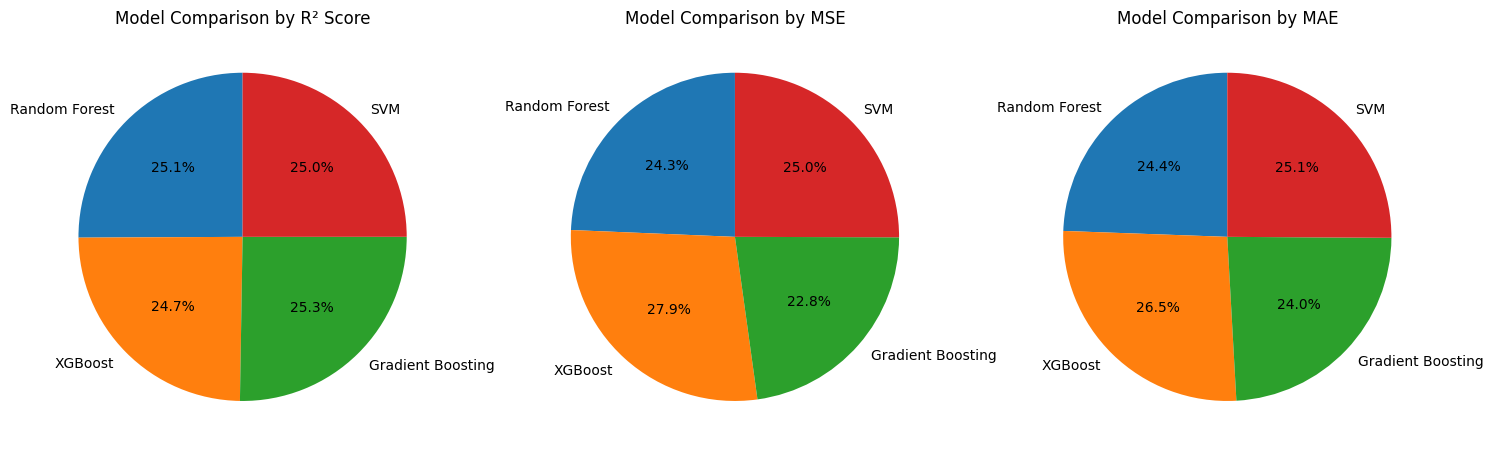

In [ ]:
# Visualizations

# Cell 10: Pie Charts for R² MSE MAE Comparison
fig1,(ax1) = plt.subplots(1 , 3 , figsize=(18 , 6))

# R² Pie Chart
ax1[0].pie([rf_r2,xgb_r2 , gb_r2 , svm_r2] , labels=["Random Forest" ,"XGBoost" ,"Gradient Boosting" ,"SVM"] ,
            autopct='%1.1f%%' , startangle=90 )
ax1[0].set_title("Model Comparison by R² Score")

# MSE Pie Chart
ax1[1].pie([rf_mse,xgb_mse , gb_mse , svm_mse] , labels=["Random Forest" ,"XGBoost" ,"Gradient Boosting" ,"SVM"] ,
            autopct='%1.1f%%' , startangle=90 )
ax1[1].set_title("Model Comparison by MSE")

# MAE Pie Chart
ax1[2].pie([rf_mae,xgb_mae , gb_mae , svm_mae] , labels=["Random Forest" ,"XGBoost" ,"Gradient Boosting" ,"SVM"] ,
            autopct='%1.1f%%' , startangle=90 )
ax1[2].set_title("Model Comparison by MAE")

plt.show()

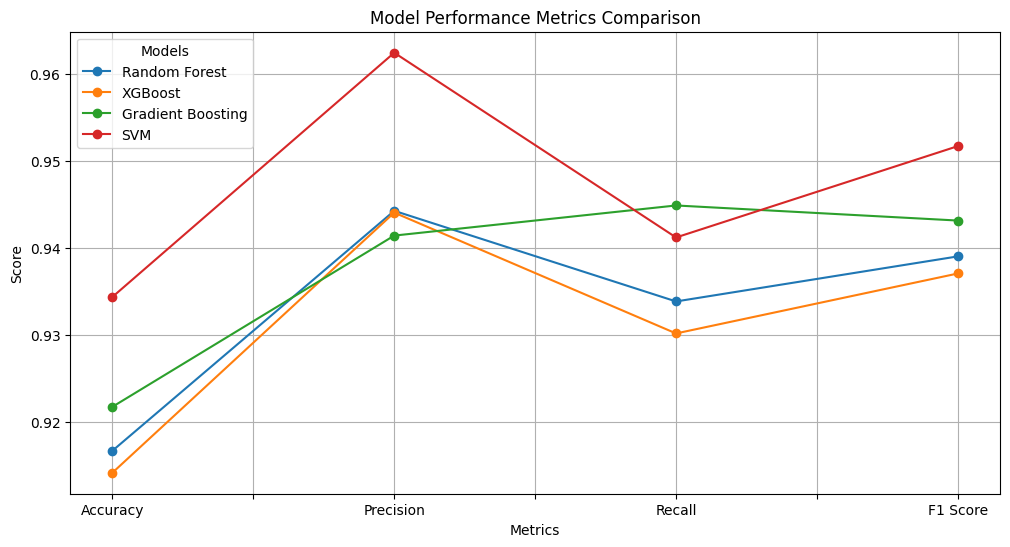

In [ ]:
# Cell 11: Line Graph for Accuracy/Precision/F1/Recall Comparison
metrics_line_graphs_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Random Forest": [rf_accuracy , rf_precision , rf_recall , rf_f1],
    "XGBoost": [xgb_accuracy , xgb_precision , xgb_recall , xgb_f1],
    "Gradient Boosting": [gb_accuracy , gb_precision , gb_recall , gb_f1],
    "SVM": [svm_accuracy , svm_precision , svm_recall , svm_f1]
}

metrics_line_graphs_df=pd.DataFrame(metrics_line_graphs_data).set_index("Metric")

metrics_line_graphs_df.plot(kind="line", marker='o', figsize=(12 , 6))
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.grid()
plt.legend(title="Models")
plt.show()


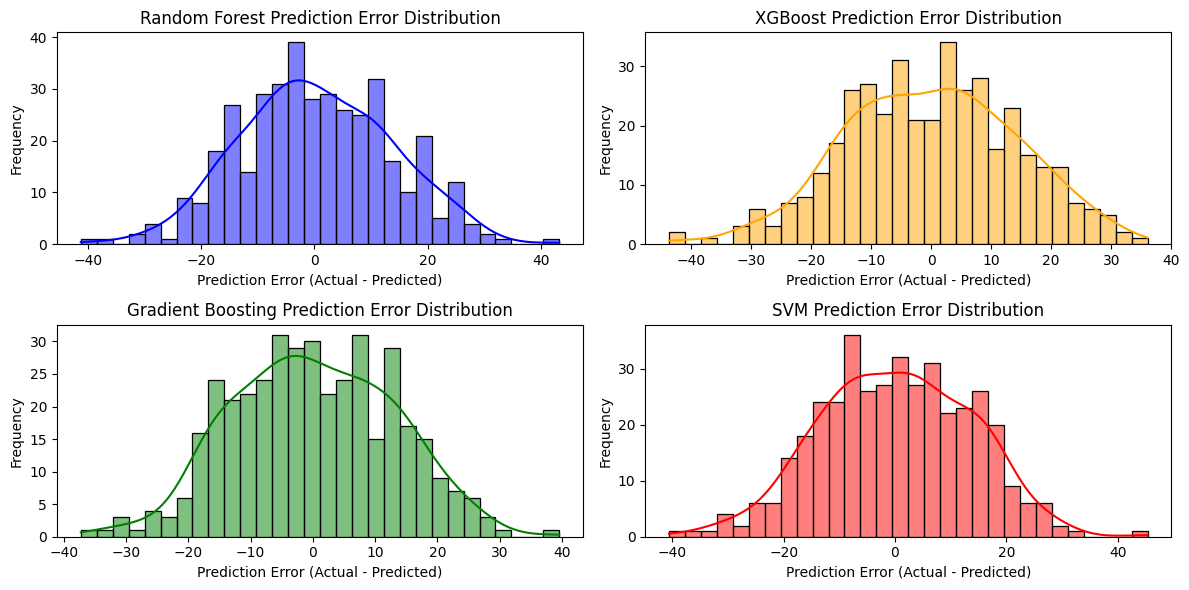

In [ ]:
# Cell 12: Prediction Error Distribution for Each Model - Separate Graphs
plt.figure(figsize=(12 , 6))

plt.subplot(221) # Random Forest Error Distribution
errors_rf= y_test - rf_predictions_rf
sns.histplot(errors_rf,bins=30,color='blue',kde=True)
plt.title('Random Forest Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.subplot(222) # XGBoost Error Distribution
errors_xbg= y_test - xgb_predictions_xgb
sns.histplot(errors_xbg,bins=30,color='orange',kde=True)
plt.title('XGBoost Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.subplot(223) # Gradient Boosting Error Distribution
errors_gb= y_test - gb_predictions_gb
sns.histplot(errors_gb,bins=30,color='green',kde=True)
plt.title('Gradient Boosting Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.subplot(224) # SVM Error Distribution
errors_svm= y_test - svm_predictions_svm
sns.histplot(errors_svm,bins=30,color='red',kde=True)
plt.title('SVM Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


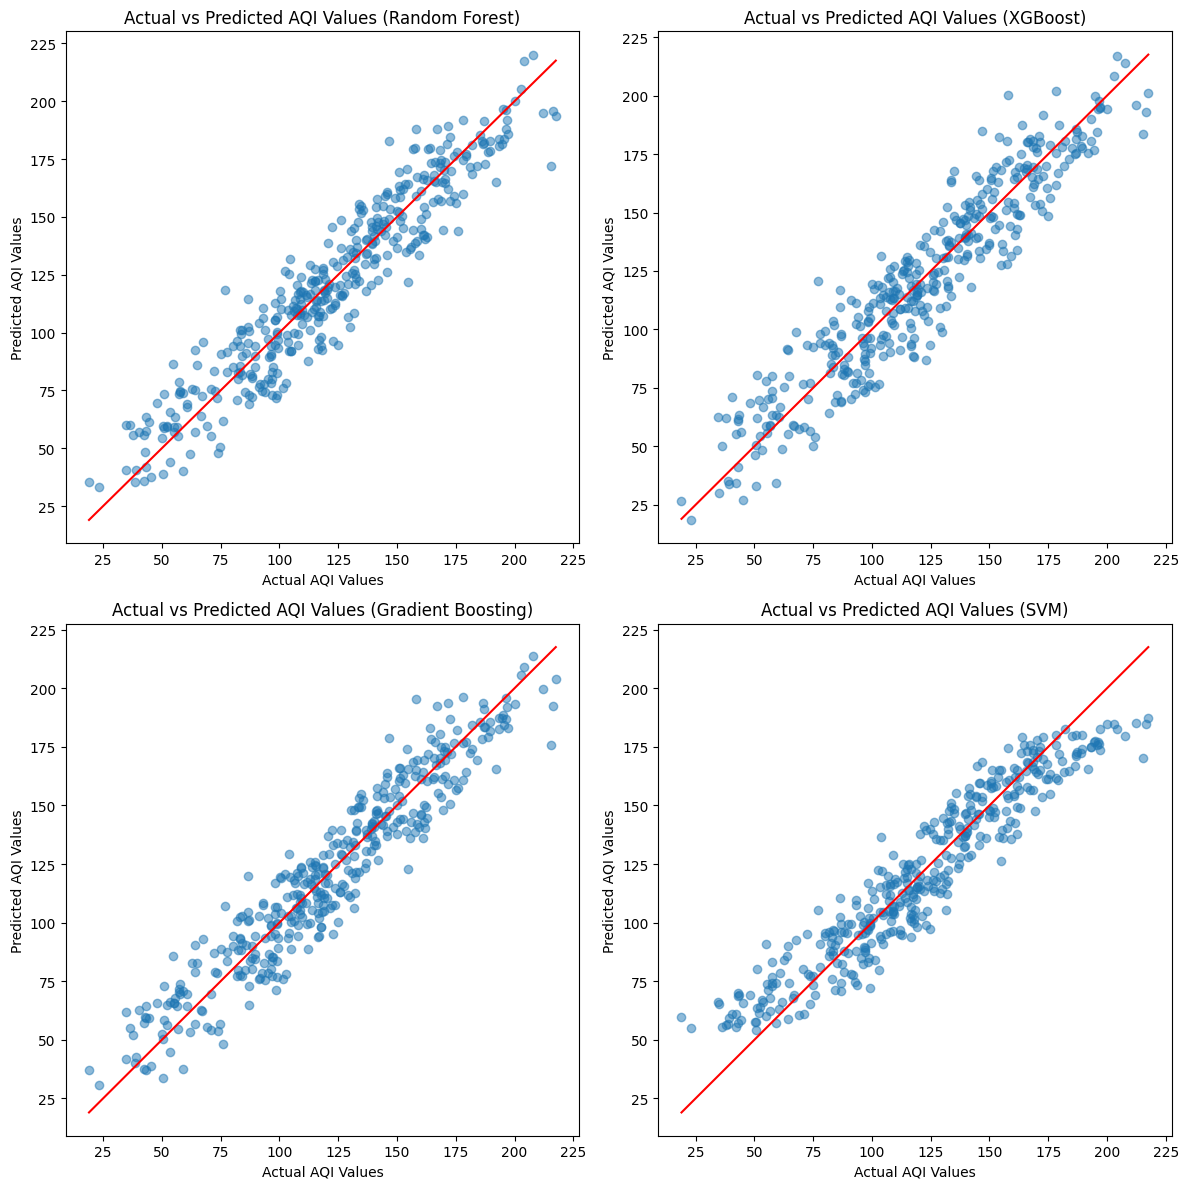

In [ ]:
# Cell 13: Actual vs Predicted Graphs for Each Model - Separate Graphs
plt.figure(figsize=(12, 12))

# Random Forest Actual vs Predicted
plt.subplot(221)
plt.scatter(y_test, rf_predictions_rf, label='Random Forest Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted AQI Values (Random Forest)')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')

# XGBoost Actual vs Predicted
plt.subplot(222)
plt.scatter(y_test, xgb_predictions_xgb, label='XGBoost Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted AQI Values (XGBoost)')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')

# Gradient Boosting Actual vs Predicted
plt.subplot(223)
plt.scatter(y_test, gb_predictions_gb, label='Gradient Boosting Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted AQI Values (Gradient Boosting)')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')

# SVM Actual vs Predicted
plt.subplot(224)
plt.scatter(y_test, svm_predictions_svm, label='SVM Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted AQI Values (SVM)')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')

plt.tight_layout()
plt.show()


Random Forest Confusion Matrix:
TP: 254, TN: 109, FP: 15, FN: 18

XGBoost Confusion Matrix:
TP: 253, TN: 109, FP: 15, FN: 19

Gradient Boosting Confusion Matrix:
TP: 257, TN: 108, FP: 16, FN: 15

SVM Confusion Matrix:
TP: 256, TN: 114, FP: 10, FN: 16



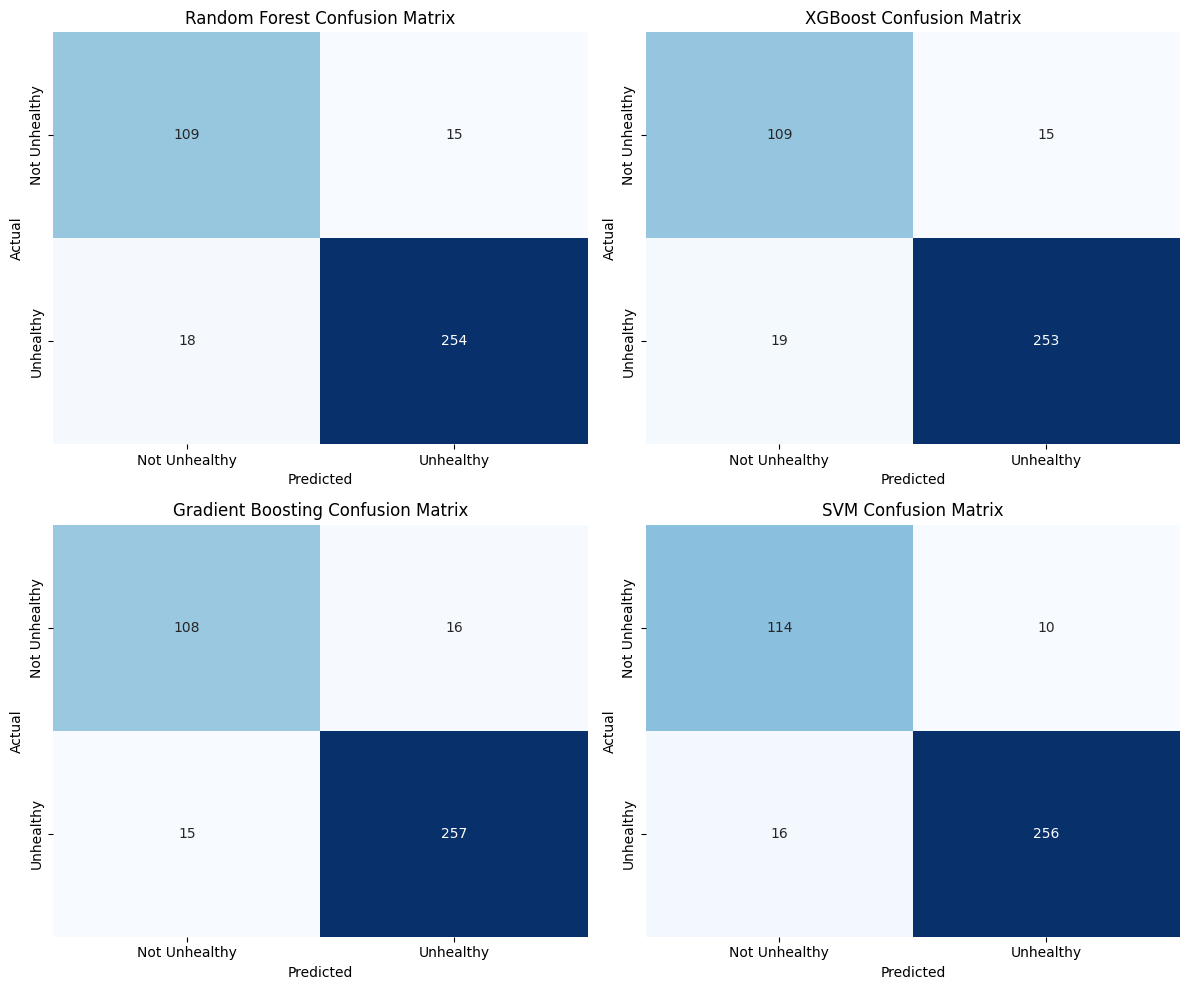

In [ ]:
# Cell 14: Confusion Matrices for Each Model with TP, TN, FP, FN Values
confusion_matrices = {
    "Random Forest": confusion_matrix(y_test_binary, y_pred_binary_rf),
    "XGBoost": confusion_matrix(y_test_binary, y_pred_binary_xgb),
    "Gradient Boosting": confusion_matrix(y_test_binary, y_pred_binary_gb),
    "SVM": confusion_matrix(y_test_binary, y_pred_binary_svm),
}

# Print TP, TN, FP, FN values for each model
for model_name in confusion_matrices:
    cm = confusion_matrices[model_name]
    TN, FP, FN, TP = cm.ravel()
    print(f"{model_name} Confusion Matrix:")
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}\n")

# Visualization of Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (model_name, cm) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax,
                cmap='Blues', cbar=False,
                xticklabels=['Not Unhealthy', 'Unhealthy'],
                yticklabels=['Not Unhealthy', 'Unhealthy'])
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
# Cell 15: User Input for Prediction
print("Please enter the following pollutant values for prediction:")

pm25_input = float(input("Enter PM2.5 (µg/m³): "))
pm10_input = float(input("Enter PM10 (µg/m³): "))
no2_input = float(input("Enter NO2 (µg/m³): "))
so2_input = float(input("Enter SO2 (µg/m³): "))
co_input = float(input("Enter CO (mg/m³): "))
o3_input = float(input("Enter O3 (µg/m³): "))

# Create a NumPy array with user inputs
user_features = np.array([[pm25_input, pm10_input, no2_input, so2_input, co_input, o3_input]])

# Convert user features to DataFrame for model predictions
user_features_df = pd.DataFrame(user_features, columns=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'])

# Predict AQI using all models and display predicted AQI values
predicted_aqi_rf = rf_model.predict(user_features_df)[0]
predicted_aqi_xgb = xgb_model.predict(user_features_df)[0]
predicted_aqi_gb = gb_model.predict(user_features_df)[0]
predicted_aqi_svm = svm_model.predict(user_features_df)[0]

print(f"Predicted AQI from Random Forest Model: {predicted_aqi_rf}")
print(f"Predicted AQI from XGBoost Model: {predicted_aqi_xgb}")
print(f"Predicted AQI from Gradient Boosting Model: {predicted_aqi_gb}")
print(f"Predicted AQI from SVM Model: {predicted_aqi_svm}")

# Calculate average AQI prediction from all models
avg_aqi_prediction = np.mean([predicted_aqi_rf, predicted_aqi_xgb, predicted_aqi_gb, predicted_aqi_svm])
print(f"Final AQI Prediction (Avergae from all models): {avg_aqi_prediction}")


Please enter the following pollutant values for prediction:
Enter PM2.5 (µg/m³): 159.3
Enter PM10 (µg/m³): 160
Enter NO2 (µg/m³): 80
Enter SO2 (µg/m³): 40.9
Enter CO (mg/m³): 60.9
Enter O3 (µg/m³): 32.5
Predicted AQI from Random Forest Model: 107.74724068513879
Predicted AQI from XGBoost Model: 107.44257354736328
Predicted AQI from Gradient Boosting Model: 112.19230169018205
Predicted AQI from SVM Model: 112.17011956208253
Final AQI Prediction (Avergae from all models): 109.88805887119167


In [ ]:
# Cell 16: Categorize AQI into health categories and calculate likelihood distribution
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Likelihood Distribution of AQI Categories across all models
categories = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]
aqi_scores = [predicted_aqi_rf, predicted_aqi_xgb, predicted_aqi_gb, predicted_aqi_svm]  # Predictions from each model

# Calculate the percentage for each category
percentages = [sum([aqi_category(score) == cat for score in aqi_scores]) / len(aqi_scores) * 100 for cat in categories]

# Final Output
final_prediction = avg_aqi_prediction
final_category = aqi_category(final_prediction)

# Display final prediction and category
print(f"\nFinal Prediction: AQI = {final_prediction:.2f}, Category = {final_category}")

# Likelihood Distribution of AQI Categories
print("\nLikelihood Distribution of AQI Categories:")
for cat, percent in zip(categories, percentages):
    print(f"{cat}: {percent:.2f}%")

# Dynamic Recommendations based on AQI category
print("\nDynamic Recommendations:")
if final_category == "Good":
    print("Air quality is safe. Enjoy outdoor activities!")
elif final_category == "Moderate":
    print("Air quality is acceptable. Sensitive individuals should avoid prolonged outdoor activities.")
elif final_category == "Unhealthy for Sensitive Groups":
    print("Sensitive groups should reduce outdoor exposure. General public should be cautious.")
elif final_category == "Unhealthy":
    print("Everyone should reduce prolonged outdoor exertion. Consider wearing masks.")
elif final_category == "Very Unhealthy":
    print("Health alert: Avoid outdoor activities. Use air purifiers indoors.")
elif final_category == "Hazardous":
    print("Emergency: Stay indoors. Follow public health warnings.")



Final Prediction: AQI = 109.89, Category = Unhealthy for Sensitive Groups

Likelihood Distribution of AQI Categories:
Good: 0.00%
Moderate: 0.00%
Unhealthy for Sensitive Groups: 100.00%
Unhealthy: 0.00%
Very Unhealthy: 0.00%
Hazardous: 0.00%

Dynamic Recommendations:
Sensitive groups should reduce outdoor exposure. General public should be cautious.


In [ ]:
# Cell 17: Function to analyze pollutant impact and suggest improvements
def analyze_pollutant_impact(input_values):
    # Define optimal range for each pollutant
    optimal_ranges = {
        "PM2.5": (0, 35),   # Good AQI level
        "PM10": (0, 50),    # Good AQI level
        "NO2": (0, 40),     # Good AQI level
        "SO2": (0, 40),     # Good AQI level
        "CO": (0, 0.9),     # Good AQI level (in mg/m³)
        "O3": (0, 60)       # Good AQI level
    }

    # Control suggestions for each pollutant based on its source
    control_suggestions = {
        "PM2.5": [
            "Reduce emissions from vehicles and industries.",
            "Minimize dust from construction sites and roads.",
            "Use public transportation or carpool.",
            "Avoid burning waste and biomass."
        ],
        "PM10": [
            "Control dust from construction, mining, and agriculture.",
            "Plant trees and vegetation to trap dust.",
            "Improve road conditions to reduce dust.",
            "Use water sprinklers to suppress dust."
        ],
        "NO2": [
            "Reduce emissions from vehicles and power plants.",
            "Improve fuel efficiency and use cleaner fuels.",
            "Promote the use of electric vehicles.",
            "Control industrial emissions."
        ],
        "SO2": [
            "Reduce emissions from power plants and industries.",
            "Use cleaner fuels with lower sulfur content.",
            "Install scrubbers in power plants to remove SO2.",
            "Promote energy efficiency and renewable energy sources."
        ],
        "CO": [
            "Reduce emissions from vehicles and industries.",
            "Ensure proper maintenance of vehicles.",
            "Improve ventilation in indoor spaces.",
            "Avoid using generators or engines in enclosed areas."
        ],
        "O3": [
            "Reduce emissions of volatile organic compounds (VOCs) from vehicles, industries, and solvents.",
            "Control emissions of nitrogen oxides (NOx).",
            "Limit outdoor activities during peak ozone hours.",
            "Plant trees and vegetation to absorb ozone."
        ]
    }

    print("\nPollutant Impact Analysis:")

    # Analyze each pollutant in the input values
    for i, pollutant in enumerate(['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']):
        value = input_values[0][i]
        optimal_min, optimal_max = optimal_ranges[pollutant]

        if value > optimal_max:
            print(f"\n- {pollutant}: Exceeds optimal range")
            print(f"   Current: {value} µg/m³ | Optimal: ≤{optimal_max} µg/m³")
            suggested_change = value - optimal_max
            print(f"   * Reduce {pollutant} by {suggested_change:.2f} µg/m³.")
            print("   * Suggestions:")
            for suggestion in control_suggestions[pollutant]:
                print(f"     - {suggestion}")

        elif value < optimal_min:
            print(f"\n- {pollutant}: Below optimal range")
            print(f"   Current: {value} µg/m³ | Optimal: ≥{optimal_min} µg/m³")
            suggested_change = optimal_min - value
            print(f"   * Increase {pollutant} by {suggested_change:.2f} µg/m³.")

        else:
            print(f"\n- {pollutant}: Within optimal range")
            print(f"   Current: {value} µg/m³")

# Call the function to analyze pollutant impact using user input values
analyze_pollutant_impact(user_features)




Pollutant Impact Analysis:

- PM2.5: Exceeds optimal range
   Current: 159.3 µg/m³ | Optimal: ≤35 µg/m³
   * Reduce PM2.5 by 124.30 µg/m³.
   * Suggestions:
     - Reduce emissions from vehicles and industries.
     - Minimize dust from construction sites and roads.
     - Use public transportation or carpool.
     - Avoid burning waste and biomass.

- PM10: Exceeds optimal range
   Current: 160.0 µg/m³ | Optimal: ≤50 µg/m³
   * Reduce PM10 by 110.00 µg/m³.
   * Suggestions:
     - Control dust from construction, mining, and agriculture.
     - Plant trees and vegetation to trap dust.
     - Improve road conditions to reduce dust.
     - Use water sprinklers to suppress dust.

- NO2: Exceeds optimal range
   Current: 80.0 µg/m³ | Optimal: ≤40 µg/m³
   * Reduce NO2 by 40.00 µg/m³.
   * Suggestions:
     - Reduce emissions from vehicles and power plants.
     - Improve fuel efficiency and use cleaner fuels.
     - Promote the use of electric vehicles.
     - Control industrial emissions

In [ ]:
# Cell 18: Predict AQI Data for Next 7 Days Based on User-Entered Date

import datetime
import pandas as pd
import numpy as np

# Function to predict future pollutant data for the next 5 years
def predict_future_aqi(start_date):
    future_data = []

    # Generate future dates for the next 5 years
    for i in range(1826):  # Next 5 years
        future_date = start_date + datetime.timedelta(days=i)

        # Use average values from the training dataset for prediction
        avg_pollutants = features.mean().values

        # Introduce variability to predictions
        variability = np.random.normal(0, 10, size=avg_pollutants.shape)  # Adjusted noise level for more variation
        varied_pollutants = avg_pollutants + variability

        # Ensure no negative values
        varied_pollutants = np.clip(varied_pollutants, 0, None)

        # Create a DataFrame with correct feature names for prediction
        input_data = pd.DataFrame(varied_pollutants.reshape(1, -1), columns=features.columns)

        # Predict AQI using all models
        predicted_aqi_rf = rf_model.predict(input_data)[0]
        predicted_aqi_xgb = xgb_model.predict(input_data)[0]
        predicted_aqi_gb = gb_model.predict(input_data)[0]
        predicted_aqi_svm = svm_model.predict(input_data)[0]

        # Calculate average AQI prediction
        avg_aqi_prediction = np.mean([predicted_aqi_rf, predicted_aqi_xgb, predicted_aqi_gb, predicted_aqi_svm])

        # Append results with date and pollutant levels
        future_data.append({
            "Date": future_date.strftime("%d-%m-%Y"),# Correct format DD-MM-YYYY
            "City": city_name,
            "PM2.5": round(varied_pollutants[0], 2),
            "PM10": round(varied_pollutants[1], 2),
            "NO2": round(varied_pollutants[2], 2),
            "SO2": round(varied_pollutants[3], 2),
            "CO": round(varied_pollutants[4], 2),
            "O3": round(varied_pollutants[5], 2),
            "Predicted AQI": round(avg_aqi_prediction, 2)
        })

    return future_data

# User input for starting date
user_date_input = input("Enter a date in DD:MM:YYYY format: ")
start_date = datetime.datetime.strptime(user_date_input, "%d:%m:%Y")

# Generate predictions for the next 5 years
future_predictions = predict_future_aqi(start_date)

# Convert predictions to DataFrame and save to CSV
predictions_df = pd.DataFrame(future_predictions)
predictions_df.to_csv(city_name+'_aqi_predictions_next_5_years.csv', index=False)

print("Predicted AQI data for the next 5 years has been saved to 'future_aqi_predictions_next_7_days.csv'.")


Enter a date in DD:MM:YYYY format: 01:03:2025
Predicted AQI data for the next 5 years has been saved to 'future_aqi_predictions_next_7_days.csv'.


In [ ]:
# Cell 19: Train Models on Future Dataset and Analyze Health Problems

# Load the future predictions from CSV
future_predictions_df = pd.read_csv(city_name+'_aqi_predictions_next_5_years.csv')
future_predictions_df.head()
# Function to predict health problems based on AQI values
def predict_health_problems(aqi_predictions):
    health_problems = {
        "Respiratory Issues": 0,
        "Cardiovascular Diseases": 0,
        "Neurological Effects": 0,
        "Headaches and Migraines": 0,
        "Allergic Reactions": 0,
        "Fatigue": 0,
        "Increased Hospital Admissions": 0,
        "Impaired Development in Children": 0,
        "Worsening of Pre-existing Conditions": 0,
        "Public Health Concerns": 0
    }

    # Assign counts based on AQI ranges
    for aqi in aqi_predictions:
        if aqi <= 50:
            health_problems["Respiratory Issues"] += 1
            health_problems["Cardiovascular Diseases"] += 1
        elif aqi <= 100:
            health_problems["Respiratory Issues"] += 1
            health_problems["Cardiovascular Diseases"] += 1
            health_problems["Headaches and Migraines"] += 1
        elif aqi <= 150:
            health_problems["Respiratory Issues"] += 2
            health_problems["Cardiovascular Diseases"] += 2
            health_problems["Neurological Effects"] += 1
            health_problems["Headaches and Migraines"] += 2
        elif aqi <= 200:
            health_problems["Respiratory Issues"] += 3
            health_problems["Cardiovascular Diseases"] += 3
            health_problems["Neurological Effects"] += 2
            health_problems["Headaches and Migraines"] += 3
            health_problems["Fatigue"] += 1
        elif aqi <= 300:
            health_problems["Respiratory Issues"] += 4
            health_problems["Cardiovascular Diseases"] += 4
            health_problems["Neurological Effects"] += 3
            health_problems["Headaches and Migraines"] += 4
            health_problems["Fatigue"] += 2
            health_problems["Increased Hospital Admissions"] += 1
        else:
            health_problems["Respiratory Issues"] += 5
            health_problems["Cardiovascular Diseases"] += 5
            health_problems["Neurological Effects"] += 4
            health_problems["Headaches and Migraines"] += 5
            health_problems["Fatigue"] += 3
            health_problems["Increased Hospital Admissions"] += 2

    # Convert counts to percentages based on the number of predictions made
    total_predictions = len(aqi_predictions)
    for problem in health_problems:
        if total_predictions > 0:
            # Calculate percentage likelihood for each problem based on occurrences.
            # Instead of dividing by total_predictions directly, we can normalize based on maximum possible occurrences.
            max_occurrences = (5 * total_predictions) if problem in ["Respiratory Issues", "Cardiovascular Diseases", "Headaches and Migraines", "Fatigue", "Increased Hospital Admissions"] else total_predictions * (1 if total_predictions < len(health_problems) else len(health_problems))

            # Calculate percentage likelihood based on occurrences.
            health_problems[problem] = (health_problems[problem] / max_occurrences) * 100

    return {k: f"{v:.2f}%" for k, v in health_problems.items()}

# Get the predicted AQI values from the future predictions DataFrame
aqi_values = future_predictions_df['Predicted AQI'].values

# Calculate the likelihood of each health problem based on predicted AQI values.
predicted_health_probs = predict_health_problems(aqi_values)

# Display predicted likelihood of each health problem.
print("\nPredicted Likelihood of Health Problems Based on Future Predictions:")
for problem, percentage in predicted_health_probs.items():
    print(f"{problem}: {percentage}")


Predicted Likelihood of Health Problems Based on Future Predictions:
Respiratory Issues: 39.99%
Cardiovascular Diseases: 39.99%
Neurological Effects: 9.99%
Headaches and Migraines: 39.99%
Allergic Reactions: 0.00%
Fatigue: 0.00%
Increased Hospital Admissions: 0.00%
Impaired Development in Children: 0.00%
Worsening of Pre-existing Conditions: 0.00%
Public Health Concerns: 0.00%
